In [1]:

import pandas as pd
import matplotlib.pyplot as plt


### PREPARACION DE LOS DATOS

PASO 1: CARGAR POBLACION POR EDAD DEL CENSO 2022 
Estos datos vienen del PDF oficial del INDEC

**Nota: El grupo 15-19 se distribuyo proporcionalmente al grupo 18-24**

In [2]:

censo_2022 = [
    {"Grupo_Edad": "18-24", "Sexo": "Hombres", "Poblacion": 3690864},
    {"Grupo_Edad": "18-24", "Sexo": "Mujeres", "Poblacion": 3544622},
    {"Grupo_Edad": "25-34", "Sexo": "Hombres", "Poblacion": 3568624},
    {"Grupo_Edad": "25-34", "Sexo": "Mujeres", "Poblacion": 3491679},
    {"Grupo_Edad": "35-49", "Sexo": "Hombres", "Poblacion": 4672508},
    {"Grupo_Edad": "35-49", "Sexo": "Mujeres", "Poblacion": 4711228},
    {"Grupo_Edad": "50-64", "Sexo": "Hombres", "Poblacion": 3116994},
    {"Grupo_Edad": "50-64", "Sexo": "Mujeres", "Poblacion": 3389206},
    {"Grupo_Edad": "65+", "Sexo": "Hombres", "Poblacion": 2275356},
    {"Grupo_Edad": "65+", "Sexo": "Mujeres", "Poblacion": 3253811},
]

df_pob_2022 = pd.DataFrame(censo_2022)
df_pob_2022['Poblacion'] = df_pob_2022['Poblacion'].astype(int)

print("TOTAL POBLACION ADULTA 2022:", df_pob_2022['Poblacion'].sum())
df_pob_2022

TOTAL POBLACION ADULTA 2022: 35714892


,Grupo_Edad,Sexo,Poblacion
0,18-24,Hombres,3690864
1,18-24,Mujeres,3544622
2,25-34,Hombres,3568624
3,25-34,Mujeres,3491679
4,35-49,Hombres,4672508
5,35-49,Mujeres,4711228
6,50-64,Hombres,3116994
7,50-64,Mujeres,3389206
8,65+,Hombres,2275356
9,65+,Mujeres,3253811


### PASO 2: CARGO EL PORCENTAJE DE DIABETES POR EDAD 

Estos datos provienen de la Encuesta Nacional de Factores de Riesgo (ENFR 2018). Estos porcentajes muestran cuantas personas tienen diabetes en cada grupo

In [3]:


prevalencia_edad = [
    {"Grupo_Edad": "18-24", "Sexo": "Hombres", "Prevalencia_%": 5.9},
    {"Grupo_Edad": "18-24", "Sexo": "Mujeres", "Prevalencia_%": 5.9},
    {"Grupo_Edad": "25-34", "Sexo": "Hombres", "Prevalencia_%": 6.2},
    {"Grupo_Edad": "25-34", "Sexo": "Mujeres", "Prevalencia_%": 6.2},
    {"Grupo_Edad": "35-49", "Sexo": "Hombres", "Prevalencia_%": 11.9},
    {"Grupo_Edad": "35-49", "Sexo": "Mujeres", "Prevalencia_%": 11.9},
    {"Grupo_Edad": "50-64", "Sexo": "Hombres", "Prevalencia_%": 19.3},
    {"Grupo_Edad": "50-64", "Sexo": "Mujeres", "Prevalencia_%": 19.3},
    {"Grupo_Edad": "65+", "Sexo": "Hombres", "Prevalencia_%": 21.4},
    {"Grupo_Edad": "65+", "Sexo": "Mujeres", "Prevalencia_%": 21.4},
]

df_prevalencia = pd.DataFrame(prevalencia_edad)
# Convierto los porcentajes a decimales (5.9% a 0.059)
df_prevalencia['Prevalencia_%'] = df_prevalencia['Prevalencia_%']/ 100

# Se verifica el promedio ponderado
print("PREVALENCIA TOTAL CALCULADA:", 
      round((df_prevalencia['Prevalencia_%'].mean() * 100), 1), "%")

df_prevalencia

PREVALENCIA TOTAL CALCULADA: 12.9 %


,Grupo_Edad,Sexo,Prevalencia_%
0,18-24,Hombres,0.059
1,18-24,Mujeres,0.059
2,25-34,Hombres,0.062
3,25-34,Mujeres,0.062
4,35-49,Hombres,0.119
5,35-49,Mujeres,0.119
6,50-64,Hombres,0.193
7,50-64,Mujeres,0.193
8,65+,Hombres,0.214
9,65+,Mujeres,0.214


### PASO 3: FUNCION PARA PROYECTAR CASOS POR AÑO 

Esta función calcula cuantos casos habrA en cada año futuro
    
    

In [4]:
def calcular_casos_por_anio(anio, poblacion_total_proyectada):
    # Poblacion base del Censo 2022
    Poblacion_base_2022 = 35714892  # Solo adultos 18+
    poblacion_total_2022 = 46044703  # Toda Argentina
    
    # ¿Cuanto creció la población?
    factor_crecimiento = poblacion_total_proyectada / poblacion_total_2022
    
    # Se multiplica cada grupo etario por el factor de crecimiento
    df_proyectada = df_pob_2022.copy()
    df_proyectada['Poblacion'] = (df_proyectada['Poblacion'] * factor_crecimiento).astype(int)
    
    # Se une prevalencia
    df_calculo = pd.merge(df_proyectada, df_prevalencia, 
                          on=['Grupo_Edad', 'Sexo'])
    
    # Se calcula casos por grupo
    df_calculo['Casos'] = (df_calculo['Poblacion'] * 
                           df_calculo['Prevalencia_%']).astype(int)
    
    #Se suman todos los casos 
    total_casos = df_calculo['Casos'].sum()
    
    prevalencia_total = round((total_casos / poblacion_total_proyectada) * 100, 2)
    
    return {
        'Año': anio,
        'Población Total': poblacion_total_proyectada,
        'Casos Diagnosticados': total_casos,
        'Prevalencia (%)': prevalencia_total
    }

### PASO 4: CALCULAR PROYECCIONES BASE (2025-2040) 

Estas son las proyecciones oficiales del INDEC

In [5]:
# Años a proyectar
anios = [2025, 2030, 2035, 2040]

# Poblaciones proyectadas por el INDEC
poblaciones = [46387098, 46744389, 47118716, 47514116]

# Calculo casos para cada año
resultados_base = []
for anio, poblacion in zip(anios, poblaciones):
    resultado = calcular_casos_por_anio(anio, poblacion)
    resultados_base.append(resultado)

# Convierto a DataFrame para visualizar
df_base = pd.DataFrame(resultados_base)

print("PROYECCION BASE-Basado en Prevalencias ENFR 2018")

df_base

PROYECCION BASE-Basado en Prevalencias ENFR 2018


,Año,Población Total,Casos Diagnosticados,Prevalencia (%)
0,2025,46387098,4453099,9.6
1,2030,46744389,4487398,9.6
2,2035,47118716,4523334,9.6
3,2040,47514116,4561291,9.6


### PASO 5: ANALISIS DE SENSIBILIDAD (±20%)

 **¿Qué pasa si la prevalencia aumenta o disminuye?**

  Se calcula tres escenarios:
- Optimista: Prevalencia baja 20% (mejores hábitos, prevención)
- Base: Prevalencia se mantiene igual (ENFR 2018)
- Pesimista: Prevalencia sube 20% (envejecimiento, obesidad)

In [6]:
def calcular_escenarios_sensibilidad():
    escenarios = {
        'Optimista (-20%)': 0.8,
        'Base (ENFR 2018)': 1.0,
        'Pesimista (+20%)': 1.2
    }
    
    resultados = []
    
    for nombre_escenario, factor_ajuste in escenarios.items():
        for anio, poblacion in zip(anios, poblaciones):
            
            # Calculo población proyectada igual que antes
            factor_crecimiento = poblacion / 46044703
            df_proyectada = df_pob_2022.copy()
            df_proyectada['Poblacion'] = (df_proyectada['Poblacion'] * 
                                          factor_crecimiento).astype(int)
            
            # Se une con prevalencia
            df_calc = pd.merge(df_proyectada, df_prevalencia, 
                              on=['Grupo_Edad', 'Sexo'])
            
            # PASO CLAVE: AJUSTAR PREVALENCIA SEGÚN ESCENARIO 
            df_calc['Prevalencia_Ajustada'] = (df_calc['Prevalencia_%'] * 
                                               factor_ajuste)
            
            # Calculo casos con prevalencia ajustada
            df_calc['Casos'] = (df_calc['Poblacion'] * 
                               df_calc['Prevalencia_Ajustada']).astype(int)
            
            total_casos = df_calc['Casos'].sum()
            prevalencia_total = round((total_casos / poblacion) * 100, 2)
            
            resultados.append({
                'Escenario': nombre_escenario,
                'Año': anio,
                'Población Total': poblacion,
                'Casos Diagnosticados': total_casos,
                'Prevalencia (%)': prevalencia_total
            })
    
    return pd.DataFrame(resultados)

df_sensibilidad = calcular_escenarios_sensibilidad()

print("ANALISIS DE SENSIBILIDAD")


df_sensibilidad

ANALISIS DE SENSIBILIDAD


,Escenario,Año,Población Total,Casos Diagnosticados,Prevalencia (%)
0,Optimista (-20%),2025,46387098,3562479,7.68
1,Optimista (-20%),2030,46744389,3589919,7.68
2,Optimista (-20%),2035,47118716,3618666,7.68
3,Optimista (-20%),2040,47514116,3649035,7.68
4,Base (ENFR 2018),2025,46387098,4453099,9.60
5,Base (ENFR 2018),2030,46744389,4487398,9.60
6,Base (ENFR 2018),2035,47118716,4523334,9.60
7,Base (ENFR 2018),2040,47514116,4561291,9.60
8,Pesimista (+20%),2025,46387098,5343719,11.52
9,Pesimista (+20%),2030,46744389,5384879,11.52


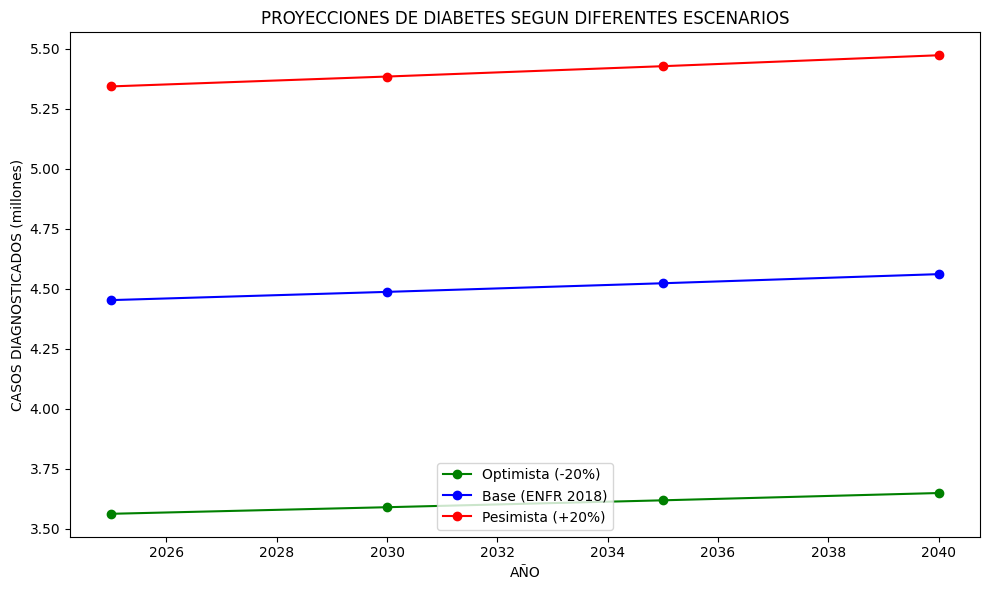

In [7]:
plt.figure(figsize=(10, 6))

# Se filtra cada caso y se grafica
escenarios = ['Optimista (-20%)', 'Base (ENFR 2018)', 'Pesimista (+20%)']
colores = ['green', 'blue', 'red']

for escenario, color in zip(escenarios, colores):
    datos = df_sensibilidad[df_sensibilidad['Escenario'] == escenario]
    plt.plot(datos['Año'], 
             datos['Casos Diagnosticados'] / 1000000,
             marker='o',
             color=color,
             label=escenario)

# Titulos y etiquetas
plt.title('PROYECCIONES DE DIABETES SEGUN DIFERENTES ESCENARIOS')
plt.xlabel('AÑO')
plt.ylabel('CASOS DIAGNOSTICADOS (millones)')

# Leyenda
plt.legend()
plt.savefig("proyecciones_segun_analisis.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

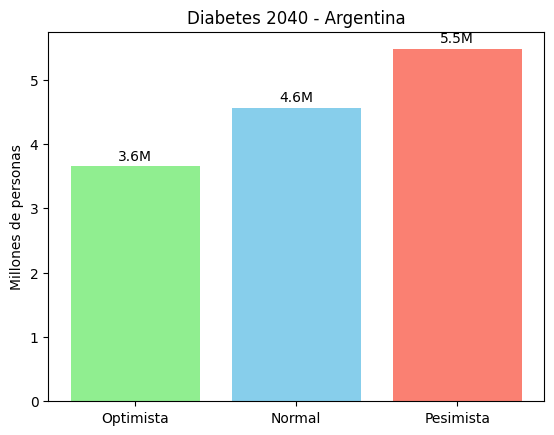

In [8]:
escenarios = ['Optimista', 'Normal', 'Pesimista']
total = [3.65, 4.56, 5.47]  # millones en 2040

plt.bar(escenarios, total, color=['lightgreen', 'skyblue', 'salmon'])
plt.title('Diabetes 2040 - Argentina')
plt.ylabel('Millones de personas')
for i, v in enumerate(total):
    plt.text(i, v + 0.1, f'{v:.1f}M', ha='center')
plt.savefig("resultados_barras_totales.png", dpi=300, bbox_inches='tight')    
plt.show()

### ¿Cómo se hizo la proyección?

**Paso 1:** Tomé la población de 2022 por edad y sexo del Censo INDEC 2022

**Paso 2:** Apliqué un factor de crecimiento general
- Factor = Población futura / Población 2022
- Ejemplo: 2040 tiene 47.5M vs 46M en 2022 entonces el factor = 1.032

**Paso 3:** Para cada grupo etario, calculé:
- Población proyectada = Población 2022 × Factor
- Casos = Población proyectada × Prevalencia del grupo

**Paso 4:** Sumé todos los grupos para obtener el total

### Limitaciones importantes:

**Simplificación:** Uso un factor de crecimiento general porque el INDEC no publica proyecciones detalladas por edad para cada año.

**Supuesto:** Asumo que la estructura etaria se mantiene similar (no se 
considera envejecimiento diferencial).

**Prevalencia constante:** Uso las tasas de 2018 que pueden cambiar con el tiempo.

### Hombres vs Mujeres- Los 3 escenarios posibles

### Año 2040: ¿cuánto tendrán diabetes según cada escenario?

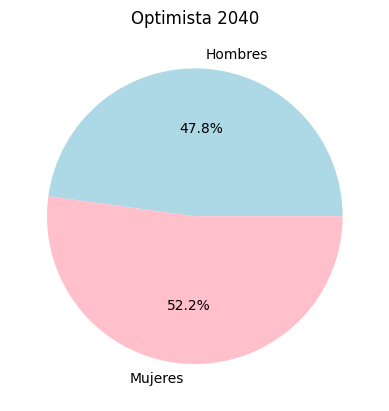

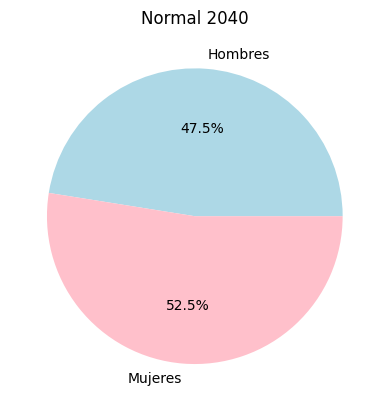

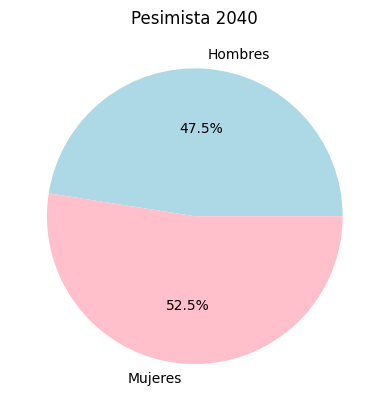

In [9]:
hombres = [2.11, 2.64, 3.17]
mujeres = [2.30, 2.92, 3.50]

for i, esc in enumerate(['Optimista', 'Normal', 'Pesimista']):
    plt.pie([hombres[i], mujeres[i]],
            labels=['Hombres', 'Mujeres'],
            colors=['lightblue', 'pink'],
            autopct='%1.1f%%') # vista del porcentaje
    plt.title(f'{esc} 2040')
    plt.savefig("resultados_tortas_2040.png", dpi=300, bbox_inches='tight')
    plt.show() 

**Optimista: Hombres 47.9% / 2.11 MILLONES, Mujeres 52.1% / 2.30 MILLONES**  

**Normal:    Hombres 47.5% / 2.64 MILLONES, Mujeres 52.5% / 2.92 MILLONES**

**Pesimista: Hombres 47.5% / 3.17 MILLONES, Mujeres 52.5% / 3.50 MILLONES**

### GRAFICO DE VALIDACION DE COMPARACION CON IDF y OPS

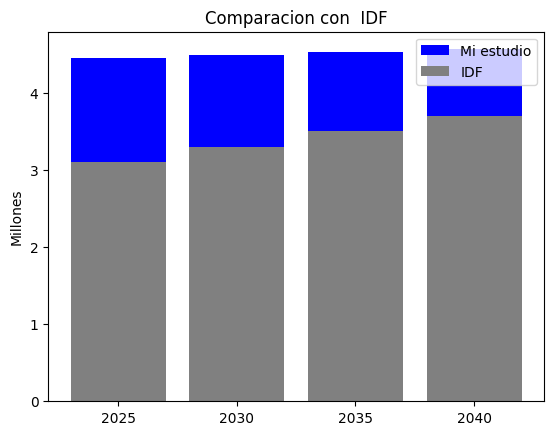

In [10]:
años = ['2025', '2030', '2035', '2040']
mi_modelo = [4.45, 4.49, 4.52, 4.56]  # mis casos
idf = [3.1, 3.3, 3.5, 3.7]             # IDF

plt.bar(años, mi_modelo, color='blue', label='Mi estudio')
plt.bar(años, idf, color='gray', label='IDF')
plt.title('Comparacion con  IDF')
plt.ylabel('Millones')
plt.legend()
plt.savefig("resultados_comparacion_idf.png", dpi=300, bbox_inches='tight')
plt.show()

**En el grafico mis barras son mas bajas porque solo cuento los que ya tienen diagnóstico. La IDF cuenta todos, incluidos los que no saben que tienen diabetes.**

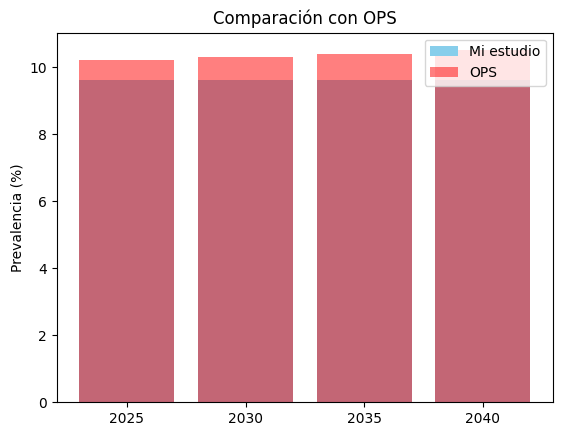

In [11]:
años = ['2025', '2030', '2035', '2040']
mi_modelo = [9.6, 9.6, 9.6, 9.6]     # mi estudio
ops = [10.2, 10.3, 10.4, 10.5]  # OPS

plt.bar(años, mi_modelo, color='skyblue', label='Mi estudio')
plt.bar(años, ops, color='red', alpha=0.5, label='OPS')
plt.title('Comparación con OPS')
plt.ylabel('Prevalencia (%)')
plt.legend()
plt.savefig("resultados_comparacion_ops.png", dpi=300, bbox_inches='tight')
plt.show()